In [28]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
from scipy.stats import norm
from generate_data import *

In [29]:
# Define parameters
n = 10000
kappa = 0.07
gamma = 0.1
rho_12 = 0.2
sigma = 1

In [30]:
# Generate cross-fitting estimators
crossfit_ests = get_cf_ests(kappa=kappa, n=n, gamma=gamma, rho_12=rho_12,\
                            sigma=sigma, num_rep=1000)

# Store generated samples
with open("cross_fitting_samples", "wb") as fp:
    pickle.dump(crossfit_ests, fp)

In [31]:
# Load stored samples
with open("cross_fitting_samples", "rb") as fp:
    crossfit_ests = np.array(pickle.load(fp))

In [32]:
# Compute sample variance
sample_var = np.var(np.sqrt(n) * (crossfit_ests - 2))
print(f"Sample variance of the cross-fitting estimator is {sample_var}")

Sample variance of the cross-fitting estimator is 26.776794120866892


In [33]:
def normal_qq(sample, theo_var):
	# Generate normal qq plot with the given theoretical variance
	# Parameters:
	# sample: list of samples for which normal qq plots are generated
	# theo_var: population variance
	
	nobs = sample.shape[0]
	percs = np.linspace(0,100,nobs)
	qn_b = np.percentile(sample, percs)
	qn_a = norm.ppf(percs/100, scale = np.sqrt(theo_var))

	# generate plots
	plt.scatter(qn_a,qn_b,  c =  "b")
	plt.plot([qn_b.min(), qn_b.max()], [qn_b.min(), qn_b.max()], c = 'r', label = '45-degree reference line')
	plt.title("Normal Q-Q Plot", fontsize=15)
	plt.xlabel("Theoretical Quantiles", fontsize=12)
	plt.ylabel("Sample Quantiles", fontsize=12)
	plt.show()

In [34]:
def normal_qq_overlaid(sample, theo_var, classical_theo_var):
	# Generate two normal qq plots with the given theoretical variances
	# Parameters:
	# sample: list of samples for which normal qq plots are generated
	# theo_var: population variance calculated according to our formula
	# classical_theo_var: population variance calculated according to the classical formula

	# generate qq plot according to our formula
	nobs = sample.shape[0]
	percs = np.linspace(0,100,nobs)
	qn_b = np.percentile(sample, percs)
	qn_a = norm.ppf(percs/100, scale = np.sqrt(theo_var))
	plt.scatter(qn_a,qn_b,  c =  "b", label = 'Our Formula')

	# generate qq plot according to the classical formula
	qn_aa = norm.ppf(percs/100, scale = np.sqrt(classical_theo_var))
	plt.scatter(qn_aa,qn_b,  c =  "c", label = 'Classical Formula')
	plt.plot([qn_b, qn_b], [qn_b, qn_b], c = 'r', label = '45-degree reference line')

	plt.title("Normal Q-Q Plot", fontsize=15)
	plt.xlabel("Theoretical Quantiles", fontsize=12)
	plt.ylabel("Sample Quantiles", fontsize=12)
	plt.legend()
	plt.show()

In [35]:
# Center and scale the estimators
scaled_crossfit_ests = (crossfit_ests-2)*np.sqrt(n)

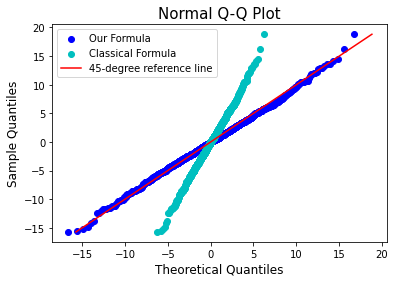

In [36]:
# Values computed in the notebook "theoretical_variance.ipynb"
theo_val = 29.18999691137837
classical_theo_var = 4.0260250417188015

# Generate normal qq plots
normal_qq_overlaid(scaled_crossfit_ests, theo_val, classical_theo_var)